<a href="https://colab.research.google.com/github/Madelavishnu/Madelavishnu/blob/main/PositionalEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐳Positional Encoding

### Read Me before going to code

In our previous discussions on self-attention and multi-head attention, we saw how transformers excel at capturing relationships between words by focusing on different parts of a sequence. However, these mechanisms alone don’t tell the model where each word is in a sentence. Since word order is crucial for understanding meaning, transformers need a way to know the position of each word. This is where positional encoding comes in. It adds information about the order of words, allowing the model to make sense of sequences like sentences. In this blog, we’ll explore how positional encoding works and why it’s key to making transformers so powerful.

In [1]:
# import some libraries

import torch
import math
import torch.nn as nn

In [2]:
max_seq_length = 10                  # MY NAME IS VISHNU (4 WORDS BUT WE DECLEARE MAX_LEN = 10)
d_model = 6

### positions for even and odd

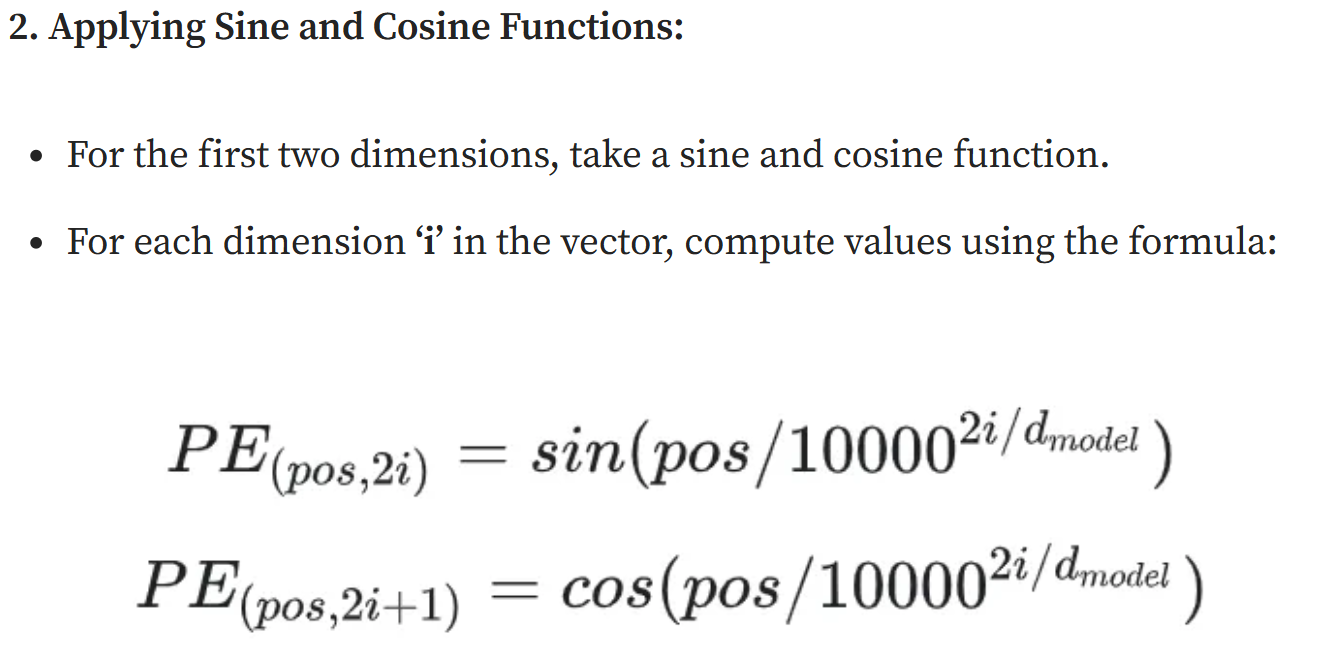

In [3]:
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [4]:
even_denominator = torch.pow(10000, even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [5]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [6]:
odd_denominator = torch.pow(10000, odd_i/d_model)

In [7]:
# instead of using odd and even denominator
denominator = even_denominator

In [8]:
position = torch.arange(max_seq_length , dtype = torch.float).reshape(max_seq_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [10]:
even_pe = torch.sin(position/ denominator)
odd_pe = torch.cos(position / denominator)

In [11]:
even_pe, odd_pe

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]))

In [12]:
even_pe.size(), odd_pe.size()

(torch.Size([10, 3]), torch.Size([10, 3]))

In [13]:
stacked = torch.stack([even_pe, odd_pe], dim = 2)
stacked.shape                                    # ([10,3,2])    those two are stackoff on eachother

torch.Size([10, 3, 2])

In [14]:
pe = torch.flatten(stacked, start_dim = 1, end_dim = 2)

😼 now let's put everything together

In [15]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_len):
        super().__init__()
        self.max_seq_len = max_seq_len
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, d_model, 2).float()
        denominator = torch.pow(10000, even_i/d_model)
        position = torch.arange(self.max_seq_len).reshape(self.max_seq_len, 1)
        even_pe = torch.sin(position/denominator)
        odd_pe = torch.cos(position/denominator)
        stacked = torch.stack([even_pe, odd_pe], dim = 2)
        pe = torch.flatten(stacked, start_dim = 1, end_dim = 2)

        return pe

In [16]:
PE = PositionalEncoding(d_model = 6, max_seq_len= 10)
PE.forward()


tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])